# **Porter: Neural Networks Regression Business Case**

Porter is India's Largest Marketplace for Intra-City Logistics. Leader in the country's $40 billion intra-city logistics market, Porter strives to improve the lives of 1,50,000+ driver-partners by providing them with consistent earning & independence. Currently, the company has serviced 5+ million customers

Porter works with a wide range of restaurants for delivering their items directly to the people.

Porter has a number of delivery partners available for delivering the food, from various restaurants and wants to get an estimated delivery time that it can provide the customers on the basis of what they are ordering, from where and also the delivery partners.

This dataset has the required data to train a regression model that will do the delivery time estimation, based on all those features

Data Dictionary

Each row in this file corresponds to one unique delivery. Each column corresponds to a feature as explained below.

    market_id : integer id for the market where the restaurant lies
    created_at : the timestamp at which the order was placed
    actual_delivery_time : the timestamp when the order was delivered
    store_primary_category : category for the restaurant
    order_protocol : integer code value for order protocol(how the order was placed ie: through porter, call to restaurant, pre booked, third part etc)
    total_items subtotal : final price of the order
    num_distinct_items : the number of distinct items in the order
    min_item_price : price of the cheapest item in the order
    max_item_price : price of the costliest item in order
    total_onshift_partners : number of delivery partners on duty at the time order was placed
    total_busy_partners : number of delivery partners attending to other tasks
    total_outstanding_orders : total number of orders to be fulfilled at the moment
    estimated_store_to_consumer_driving_duration : approximate travel time from restaurant to customer

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import keras_tuner as kt
from tensorflow import keras

In [2]:
df=pd.read_csv('data_2.csv')
df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0


In [3]:
  df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     175777 non-null  float64
 1   created_at                                    175777 non-null  object 
 2   actual_delivery_time                          175777 non-null  object 
 3   store_primary_category                        175777 non-null  int64  
 4   order_protocol                                175777 non-null  float64
 5   total_items                                   175777 non-null  int64  
 6   subtotal                                      175777 non-null  int64  
 7   num_distinct_items                            175777 non-null  int64  
 8   min_item_price                                175777 non-null  int64  
 9   max_item_price                                17

In [4]:
df.describe()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration
count,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000
mean,2.743726,35.887949,2.911752,3.204976,2697.111147,2.675060,684.965433,1160.158616,44.918664,41.861381,58.230115,546.077240
std,1.330963,20.728254,1.513128,2.674055,1828.554893,1.625681,519.882924,560.828571,34.544724,32.168505,52.731043,218.717798
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000
25%,2.000000,18.000000,1.000000,2.000000,1412.000000,1.000000,299.000000,799.000000,17.000000,15.000000,17.000000,384.000000
50%,2.000000,38.000000,3.000000,3.000000,2224.000000,2.000000,595.000000,1095.000000,37.000000,35.000000,41.000000,544.000000
75%,4.000000,55.000000,4.000000,4.000000,3410.000000,3.000000,942.000000,1395.000000,66.000000,63.000000,85.000000,703.000000
max,6.000000,72.000000,7.000000,411.000000,26800.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2088.000000


In [5]:
df.isnull().sum()

market_id                                       0
created_at                                      0
actual_delivery_time                            0
store_primary_category                          0
order_protocol                                  0
total_items                                     0
subtotal                                        0
num_distinct_items                              0
min_item_price                                  0
max_item_price                                  0
total_onshift_dashers                           0
total_busy_dashers                              0
total_outstanding_orders                        0
estimated_store_to_consumer_driving_duration    0
dtype: int64

In [6]:
df[df.duplicated()]

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration


In [7]:
df = df.drop(columns = ['market_id', 'store_primary_category'])
df

,created_at,actual_delivery_time,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration
0,2015-02-06 22:24:17,2015-02-06 23:11:17,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0
1,2015-02-10 21:49:25,2015-02-10 22:33:25,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0
2,2015-02-16 00:11:35,2015-02-16 01:06:35,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0
3,2015-02-12 03:36:46,2015-02-12 04:35:46,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0
4,2015-01-27 02:12:36,2015-01-27 02:58:36,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...
175772,2015-02-17 00:19:41,2015-02-17 01:02:41,4.0,3,1389,3,345,649,17.0,17.0,23.0,331.0
175773,2015-02-13 00:01:59,2015-02-13 01:03:59,4.0,6,3010,4,405,825,12.0,11.0,14.0,915.0
175774,2015-01-24 04:46:08,2015-01-24 05:32:08,4.0,5,1836,3,300,399,39.0,41.0,40.0,795.0
175775,2015-02-01 18:18:15,2015-02-01 19:03:15,1.0,1,1175,1,535,535,7.0,7.0,12.0,384.0


In [8]:
df.columns

Index(['created_at', 'actual_delivery_time', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders',
       'estimated_store_to_consumer_driving_duration'],
      dtype='object')

In [9]:
df.rename(columns={
    'total_onshift_dashers': 'total_onshift_partners',
    'total_busy_dashers': 'total_busy_partners'
}, inplace=True)


In [10]:
num_cols = ['order_protocol', 'total_items', 'subtotal', 'num_distinct_items',
       'min_item_price', 'max_item_price', 'total_onshift_partners',
       'total_busy_partners', 'total_outstanding_orders']
num_cols

['order_protocol',
 'total_items',
 'subtotal',
 'num_distinct_items',
 'min_item_price',
 'max_item_price',
 'total_onshift_partners',
 'total_busy_partners',
 'total_outstanding_orders']

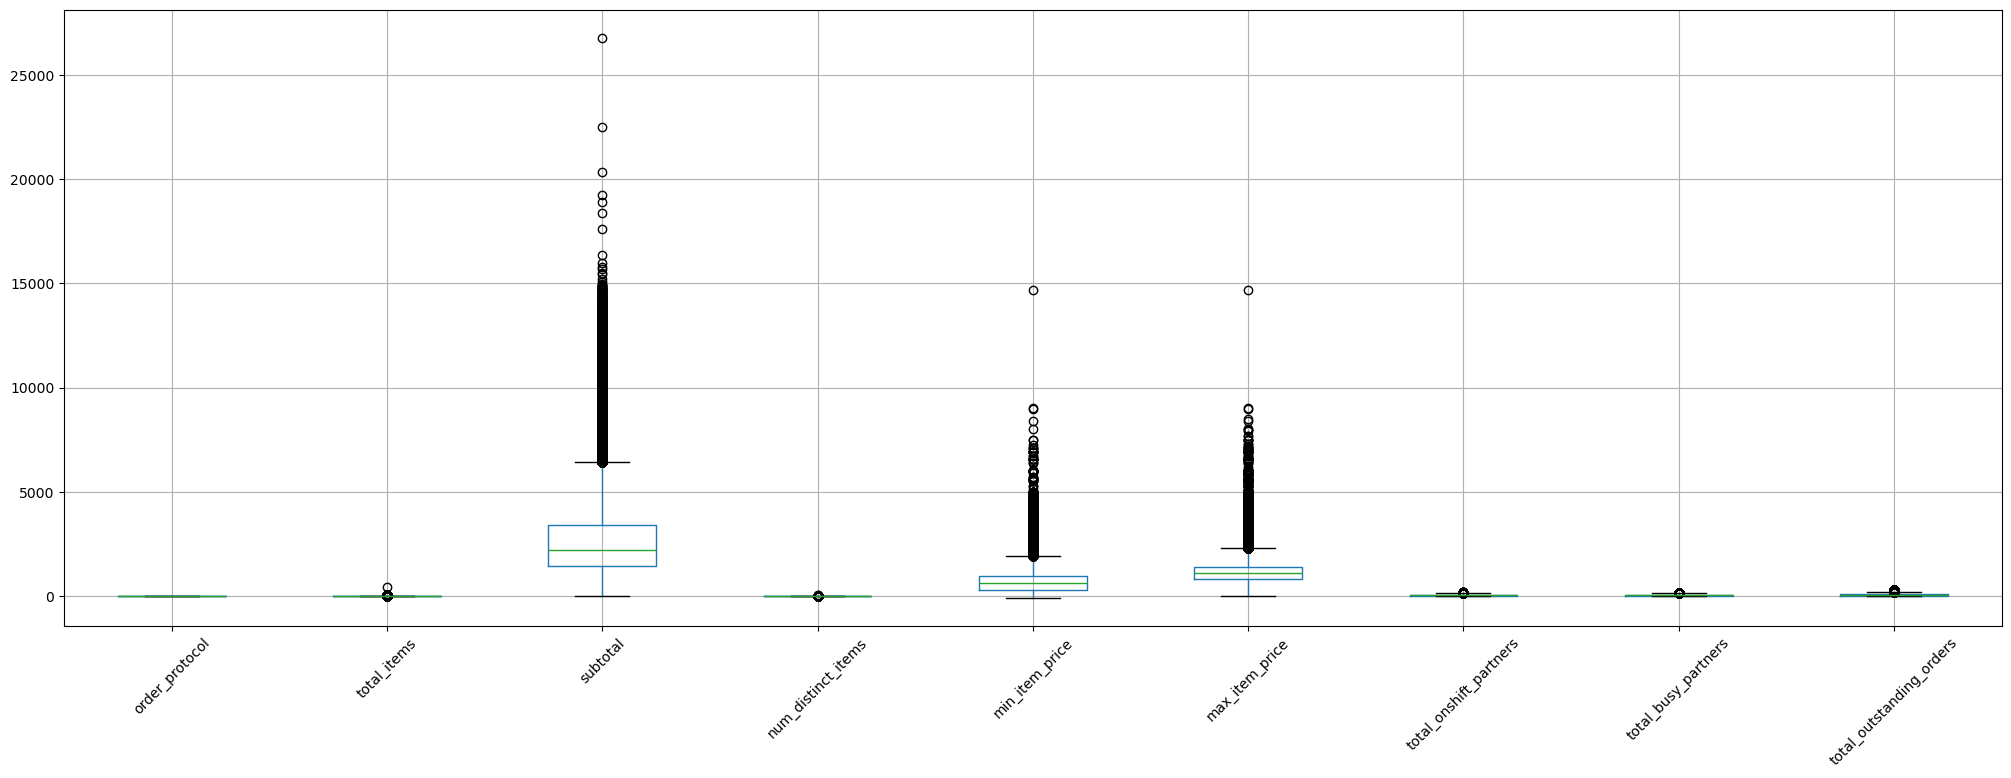

In [11]:
df[num_cols].boxplot(rot=45,figsize=(25,8))
plt.show()

In [12]:
len_before = len(df)
len_before

175777

In [13]:
model1 = LocalOutlierFactor()
df['LOF_anomaly_score'] = model1.fit_predict(df[num_cols])
df

,created_at,actual_delivery_time,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,estimated_store_to_consumer_driving_duration,LOF_anomaly_score
0,2015-02-06 22:24:17,2015-02-06 23:11:17,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0,1
1,2015-02-10 21:49:25,2015-02-10 22:33:25,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0,1
2,2015-02-16 00:11:35,2015-02-16 01:06:35,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0,1
3,2015-02-12 03:36:46,2015-02-12 04:35:46,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0,1
4,2015-01-27 02:12:36,2015-01-27 02:58:36,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175772,2015-02-17 00:19:41,2015-02-17 01:02:41,4.0,3,1389,3,345,649,17.0,17.0,23.0,331.0,1
175773,2015-02-13 00:01:59,2015-02-13 01:03:59,4.0,6,3010,4,405,825,12.0,11.0,14.0,915.0,1
175774,2015-01-24 04:46:08,2015-01-24 05:32:08,4.0,5,1836,3,300,399,39.0,41.0,40.0,795.0,1
175775,2015-02-01 18:18:15,2015-02-01 19:03:15,1.0,1,1175,1,535,535,7.0,7.0,12.0,384.0,1


In [14]:
outliers = len(df.loc[(df['LOF_anomaly_score']==-1)])
print(f'Number of outliers:{outliers}')

Number of outliers:4202


In [15]:
df=df.loc[(df['LOF_anomaly_score'] == 1)]
df

,created_at,actual_delivery_time,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,estimated_store_to_consumer_driving_duration,LOF_anomaly_score
0,2015-02-06 22:24:17,2015-02-06 23:11:17,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0,1
1,2015-02-10 21:49:25,2015-02-10 22:33:25,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0,1
2,2015-02-16 00:11:35,2015-02-16 01:06:35,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0,1
3,2015-02-12 03:36:46,2015-02-12 04:35:46,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0,1
4,2015-01-27 02:12:36,2015-01-27 02:58:36,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175772,2015-02-17 00:19:41,2015-02-17 01:02:41,4.0,3,1389,3,345,649,17.0,17.0,23.0,331.0,1
175773,2015-02-13 00:01:59,2015-02-13 01:03:59,4.0,6,3010,4,405,825,12.0,11.0,14.0,915.0,1
175774,2015-01-24 04:46:08,2015-01-24 05:32:08,4.0,5,1836,3,300,399,39.0,41.0,40.0,795.0,1
175775,2015-02-01 18:18:15,2015-02-01 19:03:15,1.0,1,1175,1,535,535,7.0,7.0,12.0,384.0,1


In [16]:
df.drop(columns = ['LOF_anomaly_score'], inplace = True)
df

C:\Users\DELL\AppData\Local\Temp\ipykernel_7504\1078611243.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ['LOF_anomaly_score'], inplace = True)


,created_at,actual_delivery_time,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,estimated_store_to_consumer_driving_duration
0,2015-02-06 22:24:17,2015-02-06 23:11:17,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0
1,2015-02-10 21:49:25,2015-02-10 22:33:25,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0
2,2015-02-16 00:11:35,2015-02-16 01:06:35,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0
3,2015-02-12 03:36:46,2015-02-12 04:35:46,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0
4,2015-01-27 02:12:36,2015-01-27 02:58:36,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...
175772,2015-02-17 00:19:41,2015-02-17 01:02:41,4.0,3,1389,3,345,649,17.0,17.0,23.0,331.0
175773,2015-02-13 00:01:59,2015-02-13 01:03:59,4.0,6,3010,4,405,825,12.0,11.0,14.0,915.0
175774,2015-01-24 04:46:08,2015-01-24 05:32:08,4.0,5,1836,3,300,399,39.0,41.0,40.0,795.0
175775,2015-02-01 18:18:15,2015-02-01 19:03:15,1.0,1,1175,1,535,535,7.0,7.0,12.0,384.0


In [17]:
len_after = len(df)
((len_before-len_after)/ (len_before))*100

2.390528908787839

## **Insight:-**

- A total of 0.65% of outlier values have been removed from the dataset using the LOF method.

## **Feature Engineering**
### Extraction datetime Features

In [18]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 171575 entries, 0 to 175776
Data columns (total 12 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   created_at                                    171575 non-null  datetime64[ns]
 1   actual_delivery_time                          171575 non-null  datetime64[ns]
 2   order_protocol                                171575 non-null  float64       
 3   total_items                                   171575 non-null  int64         
 4   subtotal                                      171575 non-null  int64         
 5   num_distinct_items                            171575 non-null  int64         
 6   min_item_price                                171575 non-null  int64         
 7   max_item_price                                171575 non-null  int64         
 8   total_onshift_partners                        171575 non-nu

C:\Users\DELL\AppData\Local\Temp\ipykernel_7504\3629165692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['created_at'] = pd.to_datetime(df['created_at'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_7504\3629165692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])


In [19]:
df['hour'] = df['created_at'].dt.hour
df['day_of_week'] = df['created_at'].dt.weekday
df.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_7504\3777465817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df['created_at'].dt.hour
C:\Users\DELL\AppData\Local\Temp\ipykernel_7504\3777465817.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_week'] = df['created_at'].dt.weekday


,created_at,actual_delivery_time,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,estimated_store_to_consumer_driving_duration,hour,day_of_week
0,2015-02-06 22:24:17,2015-02-06 23:11:17,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0,22,4
1,2015-02-10 21:49:25,2015-02-10 22:33:25,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0,21,1
2,2015-02-16 00:11:35,2015-02-16 01:06:35,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0,0,0
3,2015-02-12 03:36:46,2015-02-12 04:35:46,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0,3,3
4,2015-01-27 02:12:36,2015-01-27 02:58:36,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0,2,1


In [20]:
df.drop(columns=['created_at','actual_delivery_time'],inplace = True)
df

C:\Users\DELL\AppData\Local\Temp\ipykernel_7504\2450917584.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['created_at','actual_delivery_time'],inplace = True)


,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,estimated_store_to_consumer_driving_duration,hour,day_of_week
0,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0,22,4
1,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0,21,1
2,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0,0,0
3,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0,3,3
4,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
175772,4.0,3,1389,3,345,649,17.0,17.0,23.0,331.0,0,1
175773,4.0,6,3010,4,405,825,12.0,11.0,14.0,915.0,0,4
175774,4.0,5,1836,3,300,399,39.0,41.0,40.0,795.0,4,5
175775,1.0,1,1175,1,535,535,7.0,7.0,12.0,384.0,18,6


### Checking for outliers in Target Column

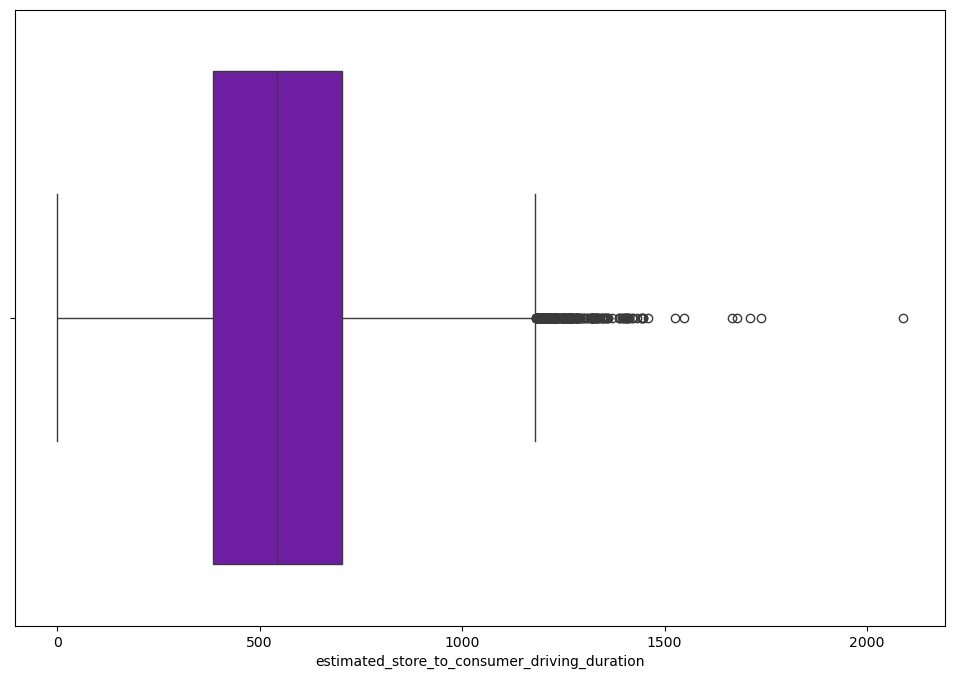

In [21]:
plt.figure(figsize=(12,8))
sns.boxplot(data = df, x = 'estimated_store_to_consumer_driving_duration', color = '#7209B7')
plt.show()

## **Insight:-**
- As we see there are few oultiers in target we need to remove these outliers before training the NN model.

### Removing Outliers in Target Column

In [22]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['estimated_store_to_consumer_driving_duration'].quantile(0.25)
Q3 = df['estimated_store_to_consumer_driving_duration'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out extreme values
df = df[(df['estimated_store_to_consumer_driving_duration'] >= lower_bound) & (df['estimated_store_to_consumer_driving_duration'] <= upper_bound)]
df

,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,estimated_store_to_consumer_driving_duration,hour,day_of_week
0,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0,22,4
1,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0,21,1
2,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0,0,0
3,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0,3,3
4,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
175772,4.0,3,1389,3,345,649,17.0,17.0,23.0,331.0,0,1
175773,4.0,6,3010,4,405,825,12.0,11.0,14.0,915.0,0,4
175774,4.0,5,1836,3,300,399,39.0,41.0,40.0,795.0,4,5
175775,1.0,1,1175,1,535,535,7.0,7.0,12.0,384.0,18,6


In [23]:
df.isnull().sum()

order_protocol                                  0
total_items                                     0
subtotal                                        0
num_distinct_items                              0
min_item_price                                  0
max_item_price                                  0
total_onshift_partners                          0
total_busy_partners                             0
total_outstanding_orders                        0
estimated_store_to_consumer_driving_duration    0
hour                                            0
day_of_week                                     0
dtype: int64

In [24]:
data = df

# EDA
## Univariate Analysis

### Distribution of 'order_protocol'

In [25]:
data

,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,estimated_store_to_consumer_driving_duration,hour,day_of_week
0,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0,22,4
1,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0,21,1
2,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0,0,0
3,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0,3,3
4,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
175772,4.0,3,1389,3,345,649,17.0,17.0,23.0,331.0,0,1
175773,4.0,6,3010,4,405,825,12.0,11.0,14.0,915.0,0,4
175774,4.0,5,1836,3,300,399,39.0,41.0,40.0,795.0,4,5
175775,1.0,1,1175,1,535,535,7.0,7.0,12.0,384.0,18,6


C:\Users\DELL\AppData\Local\Temp\ipykernel_7504\2462320060.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=values, ax=axes[0], palette="Blues_d")


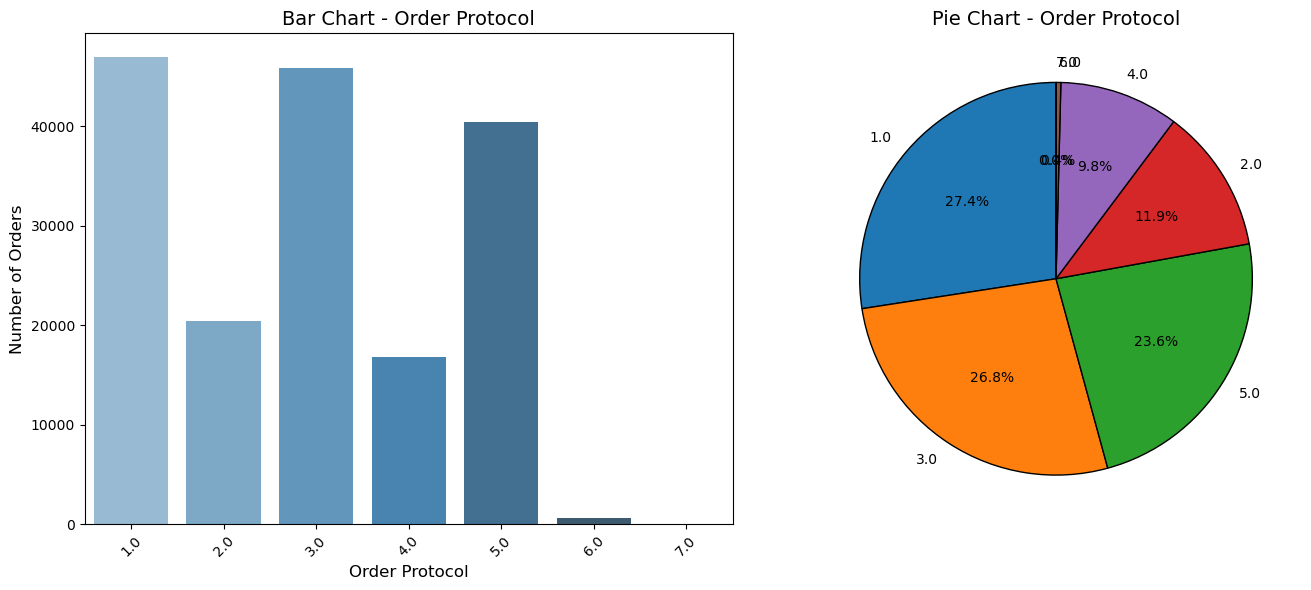

In [26]:
# Get value counts
labels = data['order_protocol'].value_counts().index
values = data['order_protocol'].value_counts().values

# Set figure size with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart using Seaborn
sns.barplot(x=labels, y=values, ax=axes[0], palette="Blues_d")
axes[0].set_title("Bar Chart - Order Protocol", fontsize=14)
axes[0].set_xlabel("Order Protocol", fontsize=12)
axes[0].set_ylabel("Number of Orders", fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Pie chart using Matplotlib
axes[1].pie(values, labels=labels, autopct='%1.1f%%', startangle=90,
            wedgeprops=dict(edgecolor='black'))
axes[1].set_title("Pie Chart - Order Protocol", fontsize=14)

plt.tight_layout()
plt.show()


## **Insight:-**

- 27.4% of orders were placed using Order Protocol 1.
- 11.9% of orders followed Order Protocol 2.
- 26.8% of orders were processed through Order Protocol 3.
- 9.8% of orders used Order Protocol 4.
- 23.6% of orders were placed via Order Protocol 5.
- The remaining % of orders were placed under Order Protocol 6 and 7.

### Distribution of 'total_items','subtotal' and 'num_distinct_items'

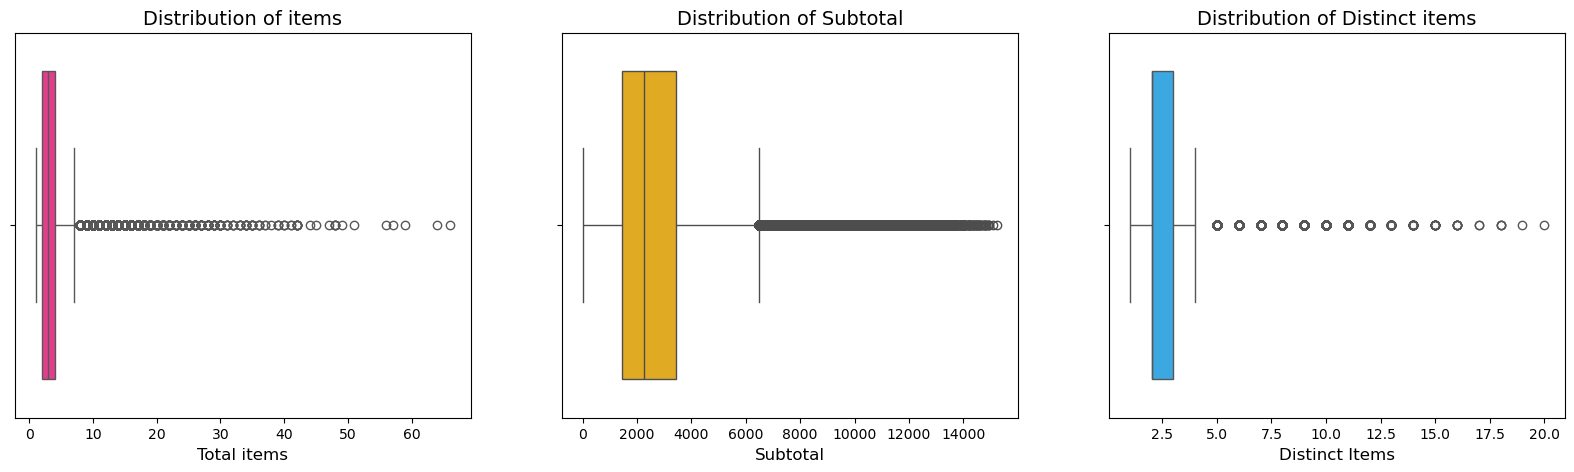

In [27]:
plt.figure(figsize=(20,5))

# Boxplot for total_items column 
plt.subplot(1,3,1)
sns.boxplot(data=data,x='total_items',color='#ff228a')
plt.xlabel('Total items',fontsize=12)
plt.title('Distribution of items',fontsize=14)

#Boxplot for subtotal column
plt.subplot(1,3,2)
sns.boxplot(data=df,x='subtotal',color='#ffb703')
plt.xlabel('Subtotal',fontsize=12)
plt.title('Distribution of Subtotal',fontsize=14)

#Boxplot for num_destinct_items
plt.subplot(1,3,3)
sns.boxplot(data=df,x='num_distinct_items',color='#20b1fd')
plt.xlabel('Distinct Items',fontsize=12)
plt.title('Distribution of Distinct items',fontsize=14)


plt.show()

## **Insight:-**

- Most orders have a small number of total items, but a few orders contain significantly higher quantities, creating outliers.

- The subtotal distribution is right-skewed, with most orders having lower values and a few high-value transactions.

- The number of distinct items per order is generally low, with some orders containing a wide variety of unique items.

- All three features exhibit right-skewed distributions, indicating the presence of extreme values that could impact analysis and decision-making.

### Distribution of total_onshift_partners, total_busy_partners and total_outstanding_orders

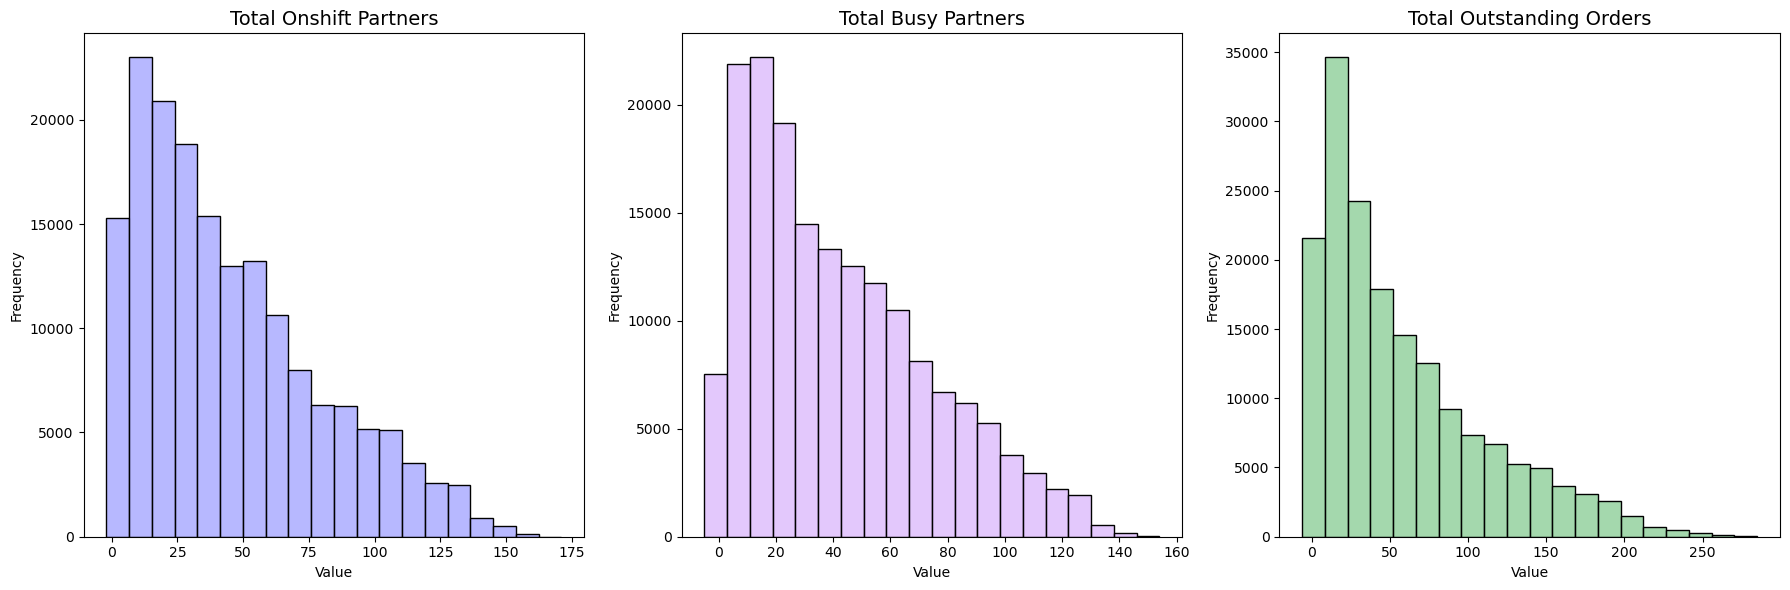

In [28]:
# Custom colors
colors = ['#9FA0FF', '#DAB6FC','#86CB92']

# Set up subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Histogram 1 - Total Onshift Partners
sns.histplot(data['total_onshift_partners'], ax=axes[0], color=colors[0], bins=20, kde=False)
axes[0].set_title("Total Onshift Partners", fontsize=14)
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Frequency")

# Histogram 2 - Total Busy Partners
sns.histplot(data['total_busy_partners'], ax=axes[1], color=colors[1], bins=20, kde=False)
axes[1].set_title("Total Busy Partners", fontsize=14)
axes[1].set_xlabel("Value")
axes[1].set_ylabel("Frequency")

# Histogram 3 - Total Outstanding Orders
sns.histplot(data['total_outstanding_orders'], ax=axes[2], color=colors[2], bins=20, kde=False)
axes[2].set_title("Total Outstanding Orders", fontsize=14)
axes[2].set_xlabel("Value")
axes[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


## **Insight:-**

**Total Onshift Partners & Total Busy Partners:**

- Most values are concentrated in the 0-50 range, with a sharp peak suggesting a common frequent value.
- The long tail indicates that higher values (up to 150) exist but are rare.
- The similar pattern in both distributions suggests that the number of available partners closely follows the number of busy partners.
- The sharp spike may indicate data irregularities or a specific operational pattern.
    
**Total Outstanding Orders:**

- The majority of outstanding orders are in the 0-50 range, similar to partner distributions.
- A sharp spike is present, which may indicate data logging issues or a highly recurring value.
- The long tail extends beyond 200, meaning that in some instances, outstanding orders pile up significantly.

## Hourly order trend

In [29]:
hour_df=df.groupby(df['hour']).agg(total_orders=('hour','count')).reset_index()
hour_df

,hour,total_orders
0,0,11142
1,1,25205
2,2,32257
3,3,23231
4,4,12916
5,5,5846
6,6,1168
7,7,8
8,8,2
9,14,38


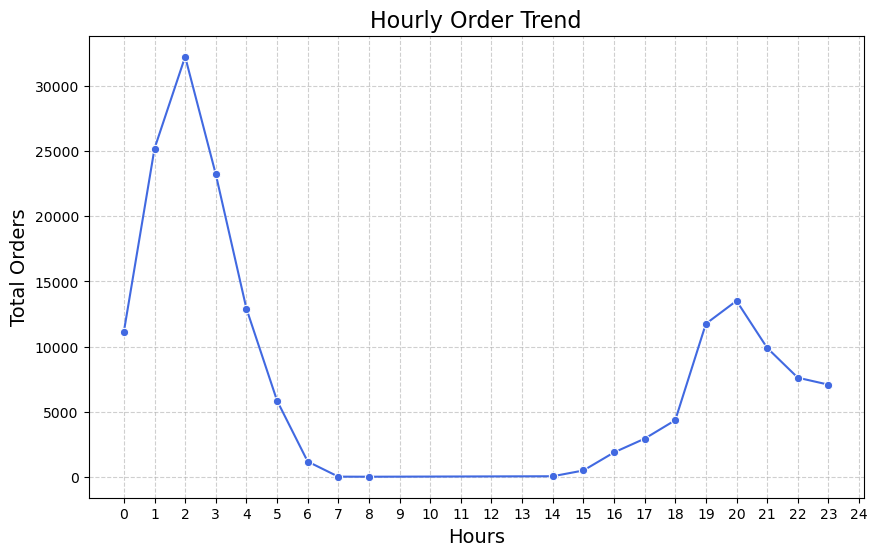

In [30]:
plt.figure(figsize=(10, 6))

# Line plot with markers
sns.lineplot(data=hour_df, x='hour', y='total_orders', marker='o', color='royalblue')

# Set x-ticks for all 24 hours
plt.xticks(range(25))

# Titles and labels
plt.title("Hourly Order Trend", fontsize=16)
plt.xlabel("Hours", fontsize=14)
plt.ylabel("Total Orders", fontsize=14)

plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

## **Insight:-**

- The number of orders shows an increasing trend from 12 AM to 2 AM, reaching its peak at 2 AM.
- A sharp decline in orders is observed between 2 AM and 7 AM.
- A flat trend between 7 AM and 2 PM suggests no orders were placed, possibly indicating a maintenance period for porters.
- Orders start rising again from 2 PM to 8 PM, followed by a decline between 8 PM and 11 PM.

#### Daily order Trend

In [31]:
daily_df=df.groupby(df['day_of_week']).agg(total_orders=('day_of_week','count')).reset_index()
daily_df

,day_of_week,total_orders
0,0,23400
1,1,20875
2,2,21254
3,3,22088
4,4,24429
5,5,30107
6,6,29109


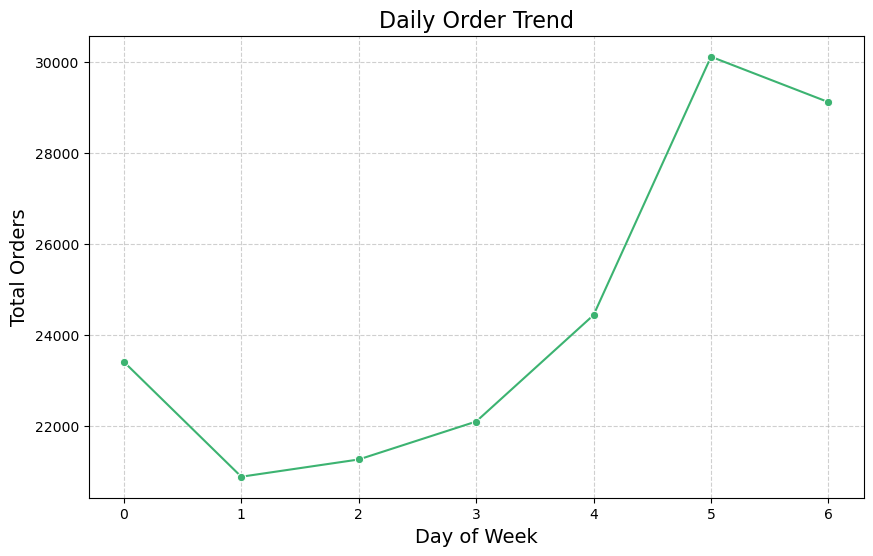

In [32]:
plt.figure(figsize=(10, 6))

# Line plot with markers
sns.lineplot(data=daily_df, x='day_of_week', y='total_orders', marker='o', color='mediumseagreen')

# If day_of_week is numeric (0-6), set ticks; otherwise, skip
if daily_df['day_of_week'].dtype in ['int64', 'float64']:
    plt.xticks(range(7))

# Titles and labels
plt.title("Daily Order Trend", fontsize=16)
plt.xlabel("Day of Week", fontsize=14)
plt.ylabel("Total Orders", fontsize=14)

plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


## **Insight:-**

- Orders started relatively high on Day 0 but dropped significantly on Day 1.
- A slight increase is observed on Day 2, followed by a steady rise from Day 3 onward.
- The highest number of orders was recorded on Day 5.
- There is a slight decline on Day 6, but the overall trend suggests increasing order activity towards the end of the week.


#### Distribution of Target Variable

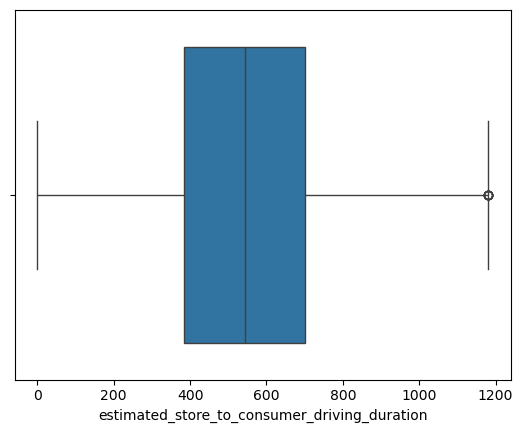

In [33]:
sns.boxplot(data = data , x='estimated_store_to_consumer_driving_duration')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_7504\388955222.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['estimated_store_to_consumer_driving_duration'], shade = True, color = '#7209B7')


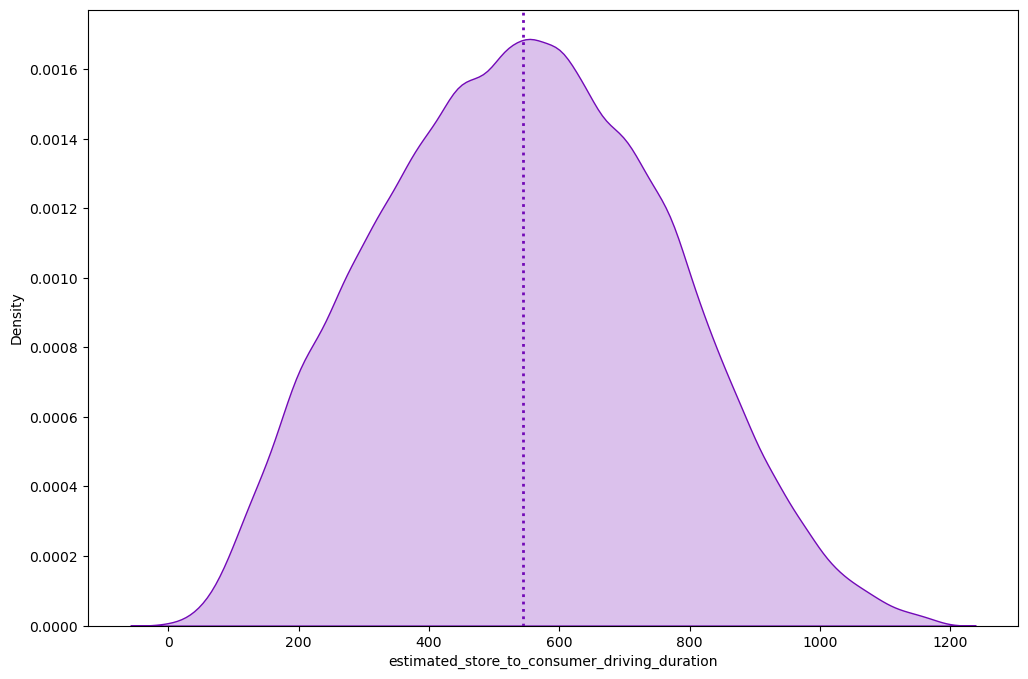

In [34]:
plt.figure(figsize = (12,8))
sns.kdeplot(df['estimated_store_to_consumer_driving_duration'], shade = True, color = '#7209B7')
plt.axvline(df['estimated_store_to_consumer_driving_duration'].mean(), color='#7209B7',linestyle=':', linewidth=2)
plt.show()

## **Insight:-**

- The average delivery time taken by a porter is approximately 500.
- The target column exhibits a slight right skew.


### Bivariate Analysis

#### Correlation Heatmap

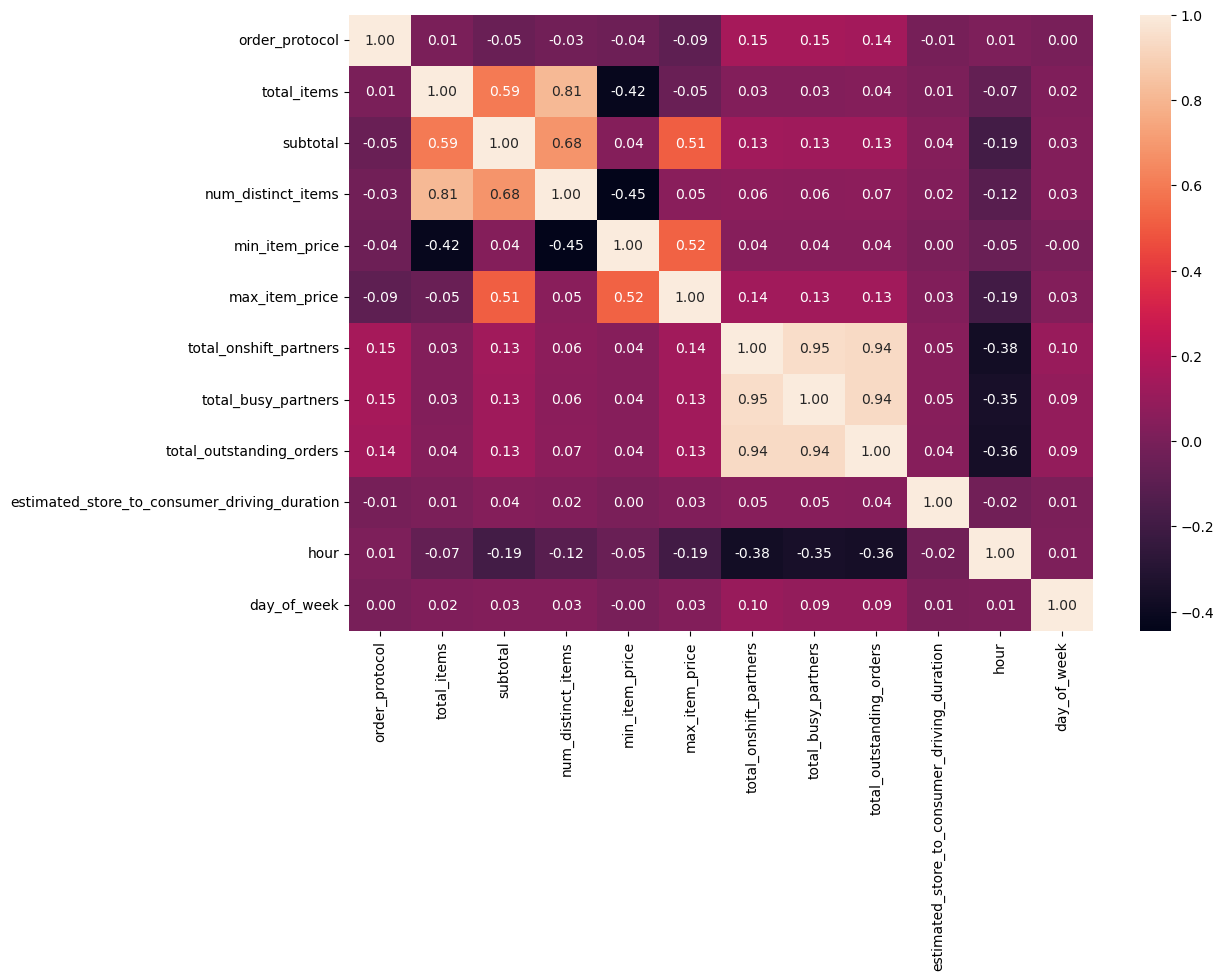

In [35]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(),annot=True,cmap='rocket',fmt='.2f')
plt.show()

In [36]:
X = df.drop(columns=['estimated_store_to_consumer_driving_duration'])
y = df['estimated_store_to_consumer_driving_duration']

In [37]:
X

,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,hour,day_of_week
0,1.0,4,3441,4,557,1239,33.0,14.0,21.0,22,4
1,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,21,1
2,3.0,4,4771,3,820,1604,8.0,6.0,18.0,0,0
3,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,3,3
4,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
175772,4.0,3,1389,3,345,649,17.0,17.0,23.0,0,1
175773,4.0,6,3010,4,405,825,12.0,11.0,14.0,0,4
175774,4.0,5,1836,3,300,399,39.0,41.0,40.0,4,5
175775,1.0,1,1175,1,535,535,7.0,7.0,12.0,18,6


In [38]:
y

0         861.0
1         690.0
2         289.0
3         795.0
4         205.0
          ...  
175772    331.0
175773    915.0
175774    795.0
175775    384.0
175776    134.0
Name: estimated_store_to_consumer_driving_duration, Length: 171262, dtype: float64

In [39]:
X_dev, X_test, y_dev, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_dev,y_dev, test_size = 0.3, random_state = 42)

In [40]:
print(f'Shape of Training Data : {X_train.shape}' )
print(f'Shape of Validation Data: {X_val.shape}')
print(f'Shape of Test Data : {X_test.shape}')

Shape of Training Data : (83918, 11)
Shape of Validation Data: (35965, 11)
Shape of Test Data : (51379, 11)


In [41]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)
X_test = scaler.fit_transform(X_test)

In [42]:
X_train

array([[-1.27018158, -0.89953898, -0.94131234, ..., -0.73161717,
        -0.62517683,  0.87065206],
       [ 0.71319151,  0.30305957, -0.76657284, ..., -0.80725285,
        -0.50974209, -0.11071649],
       [ 0.05206715, -0.89953898, -0.07580579, ...,  0.02473969,
         1.56808326,  1.36133634],
       ...,
       [ 1.37431588, -0.89953898, -1.10294637, ...,  0.10037537,
         1.22177904,  1.36133634],
       [-1.27018158,  0.70392576, -0.07853609, ..., -0.56143687,
        -0.62517683, -0.60140077],
       [ 0.05206715, -0.89953898, -0.96151659, ...,  0.32728243,
        -0.74061158,  0.37996778]])

In [43]:
X_val

array([[-1.26271257, -0.89638642, -0.93884576, ..., -0.46335758,
         1.33192938,  0.37681877],
       [ 1.38229501,  0.30081124,  0.09478711, ...,  0.99942916,
        -0.62847082,  1.35656119],
       [ 0.72104311,  0.30081124,  0.66787972, ...,  0.22054271,
        -0.97442379,  1.35656119],
       ...,
       [-0.60146068,  1.49800889,  2.35888353, ...,  1.22739592,
        -0.74378848, -1.09279486],
       [ 0.72104311,  0.30081124, -1.09054674, ...,  1.28438761,
        -0.62847082,  1.35656119],
       [ 0.05979122, -0.89638642, -0.73549032, ..., -0.19739636,
         1.33192938, -0.60292365]])

In [44]:
X_test

array([[-1.26007109,  0.70768931,  0.55334312, ..., -0.61549132,
        -0.6286746 ,  1.35680857],
       [ 1.38326272, -0.09486155, -0.26901578, ...,  0.45046571,
        -0.74408938, -1.0873897 ],
       [ 0.06159582, -0.09486155, -0.2827676 , ..., -1.07233004,
         0.75630274,  1.35680857],
       ...,
       [ 0.72242927, -0.09486155, -1.0281163 , ..., -0.6916311 ,
         1.10254707,  1.35680857],
       [ 0.72242927, -0.8974124 , -1.10237613, ..., -0.48224669,
         1.33337663, -0.10971039],
       [ 0.06159582, -0.09486155, -0.43953836, ..., -1.05329509,
         0.87171752,  0.37912927]])

#  Model Training and Building And Hyperparameter Tuning using Keras Tuner

In [45]:
def build_model(hp):
    model = keras.Sequential()

    #Define input Layer
    model.add(keras.layers.Dense(
        units = hp.Int('units', min_value = 32, max_value = 512 , step = 32), # Tune neurons 32-512
    ))
    # Apply leaky relu activation funtion
    model.add(keras.layers.LeakyReLU(alpha=0.1))

    # Batch Normalization after input layer
    model.add(keras.layers.BatchNormalization())

    # Hidden Layers with Batch Normalization & optional dropout
    for i in range(hp.Int('num_layers',1,5)): # Tune number of hidden layers : (1 to 5)
        model.add(keras.layers.Dense(
            units = hp.Int(f'units_{i}', min_value = 32, max_value = 512, step = 32),
        ))
        
        model.add(keras.layers.LeakyReLU(alpha=0.1))
        model.add(keras.layers.BatchNormalization())

        # Apply Dropout only if hp.Boolean is True
        if hp.Boolean(f'apply_dropout_{i}'):
            model.add(keras.layers.Dropout(hp.Float(f'dropout_{i}', min_value = 0.1, max_value = 0.5 , step = 0.1)))
    
    # Output Layer : (Regression : Single Neuron, Linear Activation)
    model.add(keras.layers.Dense(1, activation = 'linear'))

    # Compile model with built-in R2 metric
    model.compile(
        optimizer = keras.optimizers.Adam(
            learning_rate = hp.Float('learning_rate', min_value = 0.0001, max_value = 0.01, sampling = 'log')
        ),
        loss = 'mse', # mean squared error for regression tasks
        metrics = [keras.metrics.R2Score()] # R2 metric to evaluate performance on validation data
        
    )
    return model

In [46]:
tuner = kt.BayesianOptimization(
    build_model,
    objective=kt.Objective('val_r2_score', direction='max'),  # Maximize R2 Score
    max_trials=20,  # Number of hyperparameter combinations to test
    executions_per_trial=2,  # runs each model twice for stability
    directory='NN/working/',
    project_name='Porter_NN_Regression'  # ✅ Replaced ':' with '_'
)

Reloading Tuner from NN/working/Porter_NN_Regression\tuner0.json


**Start Hyperparameter Tuning**

In [47]:
tuner.search(
    X_train, y_train, epochs = 20, validation_data = (X_val,y_val), batch_size=512
)

**Retrive Best Hyperparameters**

In [48]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
Best number of units: {best_hps.get('units')}
Best number of layers: {best_hps.get('num_layers')}
Best learning rate: {best_hps.get('learning_rate')}
""")

for i in range(best_hps.get('num_layers')):
    if best_hps.get(f'apply_dropout_{i}'):
        print(f"Dropout applied in layer {i} with rate {best_hps.get(f'dropout_{i}')}")
    else:
        print(f"No Dropout in layer {i}")


Best number of units: 352
Best number of layers: 2
Best learning rate: 0.003312132876209958

Dropout applied in layer 0 with rate 0.4
Dropout applied in layer 1 with rate 0.1


**Train the Best Model**

In [49]:
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train, y_train, epochs = 50 , batch_size = 512, validation_data = (X_val,y_val))

Epoch 1/50


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 316877.1875 - r2_score: -5.7776 - val_loss: 255532.5469 - val_r2_score: -4.4112
Epoch 2/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 178766.9219 - r2_score: -2.8236 - val_loss: 102246.9609 - val_r2_score: -1.1652
Epoch 3/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 67838.0938 - r2_score: -0.4510 - val_loss: 50712.4375 - val_r2_score: -0.0739
Epoch 4/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 47379.1836 - r2_score: -0.0134 - val_loss: 47038.2930 - val_r2_score: 0.0039
Epoch 5/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 46648.5898 - r2_score: 0.0022 - val_loss: 46918.8477 - val_r2_score: 0.0064
Epoch 6/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 46606.3398 - r2_score: 0.0032 - val_loss: 46913.6914 - val_r2_score: 0.0066
Epoch 7/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 46598.9805 - r2_score: 0.0033 - val_loss: 46965.7070 - val_r2_score: 0.0055
Epoch 8/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/s

**Final Predictions**

In [50]:
y_pred = best_model.predict(X_test)
y_pred

1606/1606 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step  


array([[553.03143],
       [562.40546],
       [550.29724],
       ...,
       [498.58026],
       [560.0176 ],
       [552.35077]], dtype=float32)

## Evaluating Model performance 

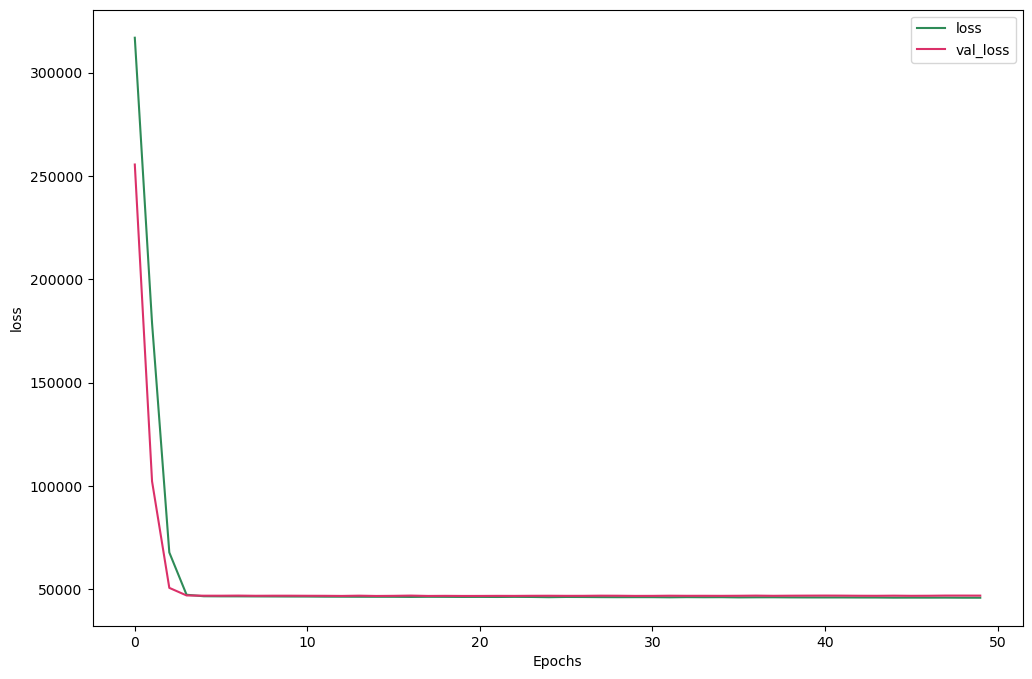

In [51]:
def plot_history(history, key):
    plt.figure(figsize = (12,8))
    plt.plot(history.history[key],color = 'seagreen')
    plt.plot(history.history['val_'+key],color = '#DB3069' )
    plt.xlabel('Epochs')
    plt.ylabel(key)
    plt.legend([key, 'val_'+key])
    plt.show()
plot_history(history,'loss')

### **Insights:-**

- 27.4% of orders were placed using Order Protocol 1.
- 11.9% of orders followed Order Protocol 2.
- 26.8% of orders were processed through Order Protocol 3.
- 9.8% of orders used Order Protocol 4.
- 23.6% of orders were placed via Order Protocol 5.
- The remaining % of orders were placed under Order Protocol 6 and 7.
- Most orders have a small number of total items, but a few orders contain significantly higher quantities, creating outliers.
- The subtotal distribution is right-skewed, with most orders having lower values and a few high-value transactions.
- The number of distinct items per order is generally low, with some orders containing a wide variety of unique items.
- Total Onshift Partners & Total Busy Partners:

    - Most values are concentrated in the 0-50 range, with a sharp peak suggesting a common frequent value.
    - The long tail indicates that higher values (up to 150) exist but are rare.
    - The similar pattern in both distributions suggests that the number of available partners closely follows the number of busy partners.
    - The sharp spike may indicate data irregularities or a specific operational pattern.

- Total Outstanding Orders:

    - The majority of outstanding orders are in the 0-50 range, similar to partner distributions.
    - A sharp spike is present, which may indicate data logging issues or a highly recurring value.
    - The long tail extends beyond 200, meaning that in some instances, outstanding orders pile up significantly.

- The number of orders shows an increasing trend from 12 AM to 2 AM, reaching its peak at 2 AM.
- A sharp decline in orders is observed between 2 AM and 7 AM.
- A flat trend between 7 AM and 2 PM suggests no orders were placed, possibly indicating a maintenance period for porters.
- Orders start rising again from 2 PM to 8 PM, followed by a decline between 8 PM and 11 PM.
- Orders started relatively high on Day 0 but dropped significantly on Day 1.
- A slight increase is observed on Day 2, followed by a steady rise from Day 3 onward.
- The highest number of orders was recorded on Day 5.
- There is a slight decline on Day 6, but the overall trend suggests increasing order activity towards the end of the week.
- The average delivery time taken by a porter is approximately 43 minutes.
- The target column exhibits a slight right skew.



# Recommendations

1. Optimize Workforce Allocation:
     - Since partner availability closely follows demand, ensure adequate staffing during peak hours (12 AM   - 2 AM and 2 PM - 8 PM).
    - Address potential bottlenecks by having on-call partners during high-demand periods.
    
2. Investigate and Address Data Anomalies:
    - The sharp spikes in partner availability and outstanding orders suggest possible data irregularities or operational inefficiencies.
    - Conduct a thorough review of order logging processes to ensure accuracy and avoid recurring issues.
    
3. Improve Order Processing Efficiency:
    - Since a few orders contain significantly higher item counts, consider implementing batch processing or priority handling for large orders.
    - Reduce outliers by optimizing inventory management and order fulfillment workflows.
    
4. Adjust Service Hours for Better Order Fulfillment:
    - The flat trend between 7 AM - 2 PM suggests a possible service gap.
    - If feasible, explore options to extend porter availability or introduce scheduled order fulfillment to maintain order consistency.
    
5. Enhance High-Value Order Handling:
    - The right-skewed subtotal distribution indicates a few high-value transactions.
    - Implement strategies such as VIP customer prioritization, dedicated delivery partners, or premium service options to enhance service for high-value orders.